In [1]:
%%time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Order 66
%config Completer.use_jedi=False
# Ease
import sys
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 70)
sys.path.append("K:\\Projects\\vscProject\\Kaggle\\HousePrices")

Wall time: 2.92 s


In [2]:
%%time
# Coustom Data Module
from Script.data import data

X_train, y_train, X_test, y_samp = data()

Tokenization took: 1.00 ms
Type conversion took: 2.00 ms
Parser memory cleanup took: 0.00 ms
Tokenization took: 9.99 ms
Type conversion took: 21.99 ms
Parser memory cleanup took: 0.00 ms
Tokenization took: 10.99 ms
Type conversion took: 20.99 ms
Parser memory cleanup took: 0.00 ms
Wall time: 3.56 s


In [3]:
print(f"{X_train.shape = }")
print(f"{X_test.shape  = }")

X_train.shape = (1460, 57)
X_test.shape  = (1459, 57)


In [4]:
X_train

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,HeatingQC,CentralAir,Electrical,LowQualFinSF,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Total_SF,Age_At_Sale,Remodel_Done,All_bath,Road,Age_Garage,Floors_no
0,14.0,3.0,65.0,8450.0,0.0,1.0,0.0,16.0,4.0,4.0,6.0,7.0,5.0,2003.0,1.0,11.0,4.0,2.0,196.0,2.0,5.0,2.0,0.0,5.0,706.0,0.0,0.0,1.0,1.0,0.0,3.0,2.0,8.0,7.0,0.0,1.0,5.0,2003.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,2.0,2008.0,0.0,4.0,3175.0,5.0,0.0,4.0,3.0,5.0,2.0
1,11.0,3.0,80.0,9600.0,0.0,1.0,1.0,20.0,2.0,4.0,5.0,6.0,8.0,1976.0,1.0,4.0,1.0,1.0,0.0,1.0,2.0,2.0,3.0,4.0,978.0,0.0,0.0,1.0,1.0,0.0,3.0,1.0,6.0,7.0,1.0,3.0,5.0,1976.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,5.0,2007.0,0.0,4.0,3282.0,31.0,0.0,3.0,3.0,31.0,1.0
2,14.0,3.0,68.0,11250.0,1.0,1.0,0.0,16.0,4.0,4.0,6.0,7.0,5.0,2002.0,1.0,11.0,4.0,2.0,162.0,2.0,5.0,2.0,1.0,5.0,486.0,0.0,0.0,1.0,1.0,0.0,3.0,2.0,6.0,7.0,1.0,3.0,5.0,2001.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,9.0,2008.0,0.0,4.0,3356.0,7.0,1.0,4.0,3.0,7.0,2.0
3,9.0,3.0,60.0,9550.0,1.0,1.0,2.0,17.0,4.0,4.0,6.0,7.0,5.0,1970.0,1.0,5.0,3.0,1.0,0.0,1.0,1.0,1.0,0.0,4.0,216.0,0.0,1.0,1.0,1.0,0.0,3.0,2.0,7.0,7.0,1.0,4.0,2.0,1998.0,1.0,3.0,2.0,2.0,2.0,0.0,0.0,0.0,2.0,2006.0,0.0,1.0,3422.0,91.0,1.0,2.0,3.0,8.0,2.0
4,14.0,3.0,84.0,14260.0,1.0,1.0,1.0,24.0,4.0,4.0,6.0,8.0,5.0,2000.0,1.0,11.0,4.0,2.0,350.0,2.0,5.0,2.0,2.0,5.0,655.0,0.0,0.0,1.0,1.0,0.0,4.0,2.0,9.0,7.0,1.0,3.0,5.0,2000.0,2.0,3.0,2.0,2.0,2.0,0.0,0.0,0.0,12.0,2008.0,0.0,4.0,4455.0,8.0,0.0,4.0,3.0,8.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,14.0,3.0,62.0,7917.0,0.0,1.0,0.0,14.0,4.0,4.0,6.0,6.0,5.0,2000.0,1.0,11.0,4.0,1.0,0.0,1.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,1.0,7.0,7.0,1.0,3.0,5.0,1999.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,8.0,2007.0,0.0,4.0,3100.0,8.0,1.0,3.0,3.0,8.0,2.0
1456,11.0,3.0,85.0,13175.0,0.0,1.0,0.0,13.0,4.0,4.0,5.0,6.0,6.0,1988.0,1.0,9.0,2.0,3.0,119.0,1.0,2.0,2.0,0.0,4.0,790.0,2.0,2.0,1.0,1.0,0.0,3.0,1.0,7.0,6.0,2.0,3.0,5.0,1978.0,1.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,2.0,2010.0,0.0,4.0,4464.0,32.0,1.0,3.0,3.0,32.0,1.0
1457,9.0,3.0,66.0,9042.0,0.0,1.0,0.0,17.0,4.0,4.0,6.0,7.0,9.0,2006.0,1.0,12.0,3.0,1.0,0.0,3.0,3.0,1.0,0.0,5.0,275.0,0.0,0.0,1.0,1.0,0.0,4.0,2.0,9.0,7.0,2.0,4.0,5.0,1941.0,2.0,1.0,2.0,2.0,2.0,0.0,0.0,2500.0,5.0,2010.0,0.0,4.0,3804.0,69.0,1.0,2.0,3.0,69.0,2.0
1458,11.0,3.0,68.0,9717.0,0.0,1.0,0.0,10.0,4.0,4.0,5.0,5.0,6.0,1996.0,4.0,4.0,1.0,1.0,0.0,1.0,2.0,1.0,1.0,5.0,49.0,2.0,1.0,1.0,0.0,0.0,2.0,2.0,5.0,7.0,0.0,1.0,5.0,1950.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,0.0,4.0,2010.0,0.0,4.0,2874.0,60.0,1.0,2.0,3.0,60.0,1.0


In [22]:
from sklearn.metrics import mean_squared_error, make_scorer


def root_mean_squared_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average'):
    return mean_squared_error(y_true, y_pred, sample_weight=sample_weight, multioutput=multioutput, squared=False)

root_mean_squared_error = make_scorer(root_mean_squared_error, greater_is_better=False)

In [10]:
%%time

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, RepeatedKFold
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, VotingRegressor, StackingRegressor

from sklearn.preprocessing import PowerTransformer, RobustScaler, QuantileTransformer
from sklearn.pipeline import Pipeline, make_pipeline

Wall time: 1.26 s


In [11]:
cv = RepeatedKFold(random_state=2144)

In [23]:
def my_sub(y_pred: np.ndarray, file_name: str) -> str:
    y_samp.SalePrice = y_pred
    path_0 = "../Sub/"
    path_1 = ".csv"
    full_path = path_0 + file_name + path_1
    y_samp.astype(np.int64).to_csv(full_path, index=False)
    return full_path



def Pre_Process_Data(X_train, y_train, X_test, y_transformer=None):
    # X_transform
    transformer_pipe_for_X = Pipeline(
        [
            ("normalizer", QuantileTransformer(output_distribution='normal')),
            ("scaler"    , RobustScaler())
        ]
    )
    transformer_pipe_for_y = Pipeline(
        [
            ("normalizer", QuantileTransformer(output_distribution='normal')),
            ("scaler"    , RobustScaler())
        ]
    )
    X_train_scale = pd.DataFrame(transformer_pipe_for_X.fit_transform(X_train),columns=X_train.columns,index=X_train.index)
    X_test_scale  = pd.DataFrame(transformer_pipe_for_X.transform(X_test),columns=X_test.columns,index=X_test.index)
    # y-transform
    y_train_scale = pd.Series(transformer_pipe_for_y.fit_transform(y_train.values.reshape(-1,1)).reshape(-1))
    return X_train_scale, y_train_scale, X_test_scale, transformer_pipe_for_y


X_train_, y_train_, X_test_, y_transform = Pre_Process_Data(X_train, y_train,X_test)



class cmd_rscv:
    def __init__(self, estimator, param_distributions, n_iter=10, *, scoring=root_mean_squared_error, n_jobs=-2, cv=cv, verbose=1, random_state=None, **kwargs):
        self.rscv_model = RandomizedSearchCV(
            estimator,
            param_distributions,
            n_iter       = n_iter,
            scoring      = scoring,
            n_jobs       = n_jobs,
            cv           = cv,
            verbose      = verbose,
            random_state = random_state,
            **kwargs
        )
    def doit(self, X_train=X_train_, y=y_train_):
        self.rscv_model.fit(X_train_, y_train_)
        self.cv_data_ = pd.DataFrame(self.rscv_model.cv_results_).sort_values(by="rank_test_score")
        self.best_    = self.rscv_model.best_params_
    def df(self, head=5):
        return self.cv_data_.head(head)
    def best(self):
        return self.best_
    def pred(X_test=X_test_):pass

    


In [24]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

In [25]:

param_grid = {
    
    "fit_intercept": [True, False],
    "normalize"    : [True, False],
    "n_jobs"       : [-2],
    "positive"     : [True, False],
}

lr_gscv = GridSearchCV(
    LinearRegression(),
    param_grid,
    scoring = root_mean_squared_error,
    n_jobs  = -2,
    cv      = cv,
    verbose = 1,
)

In [28]:
pd.DataFrame(lr_gscv.cv_results_).sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_fit_intercept,param_n_jobs,param_normalize,param_positive,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,split15_test_score,split16_test_score,split17_test_score,split18_test_score,split19_test_score,split20_test_score,split21_test_score,split22_test_score,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,split30_test_score,split31_test_score,split32_test_score,split33_test_score,split34_test_score,split35_test_score,split36_test_score,split37_test_score,split38_test_score,split39_test_score,split40_test_score,split41_test_score,split42_test_score,split43_test_score,split44_test_score,split45_test_score,split46_test_score,split47_test_score,split48_test_score,split49_test_score,mean_test_score,std_test_score,rank_test_score
3,0.017509,0.004443,0.007996,0.004997,True,-2,False,False,"{'fit_intercept': True, 'n_jobs': -2, 'normali...",-0.265493,-0.277808,-0.218435,-0.265705,-0.210791,-0.295662,-0.247574,-0.223290,-0.228711,-0.243233,-0.239507,-0.269461,-0.220399,-0.279595,-0.248259,-0.197739,-0.270829,-0.220732,-0.272614,-0.273891,-0.317029,-0.251074,-0.214437,-0.217824,-0.225899,-0.210929,-0.260074,-0.264497,-0.259545,-0.240506,-0.267551,-0.216338,-0.251976,-0.260572,-0.255093,-0.238153,-0.276423,-0.245305,-0.272145,-0.211303,-0.237283,-0.273339,-0.207638,-0.262843,-0.264443,-0.210367,-0.229316,-0.264458,-0.259249,-0.283657,-0.248380,0.026245,1
1,0.014451,0.001080,0.005378,0.000797,True,-2,True,False,"{'fit_intercept': True, 'n_jobs': -2, 'normali...",-0.265493,-0.277808,-0.218435,-0.265705,-0.210791,-0.295662,-0.247574,-0.223290,-0.228711,-0.243233,-0.239507,-0.269461,-0.220399,-0.279595,-0.248259,-0.197739,-0.270829,-0.220732,-0.272614,-0.273891,-0.317029,-0.251074,-0.214437,-0.217824,-0.225899,-0.210929,-0.260074,-0.264497,-0.259545,-0.240506,-0.267551,-0.216338,-0.251976,-0.260572,-0.255093,-0.238153,-0.276423,-0.245305,-0.272145,-0.211303,-0.237283,-0.273339,-0.207638,-0.262843,-0.264443,-0.210367,-0.229316,-0.264458,-0.259249,-0.283657,-0.248380,0.026245,2
5,0.019828,0.006080,0.007976,0.003889,False,-2,True,False,"{'fit_intercept': False, 'n_jobs': -2, 'normal...",-0.266045,-0.278166,-0.217827,-0.266093,-0.211443,-0.295983,-0.247856,-0.223434,-0.229183,-0.243793,-0.240253,-0.268847,-0.221446,-0.279369,-0.248844,-0.198699,-0.271607,-0.216677,-0.272809,-0.274699,-0.317218,-0.251844,-0.214880,-0.217200,-0.224534,-0.211845,-0.260423,-0.264896,-0.259587,-0.240622,-0.268334,-0.215426,-0.251992,-0.261182,-0.255360,-0.238932,-0.275809,-0.243650,-0.272935,-0.212284,-0.236507,-0.273791,-0.207455,-0.262715,-0.265239,-0.210163,-0.229799,-0.265252,-0.259032,-0.283697,-0.248514,0.026380,3
7,0.016031,0.002520,0.006876,0.001607,False,-2,False,False,"{'fit_intercept': False, 'n_jobs': -2, 'normal...",-0.266045,-0.278166,-0.217827,-0.266093,-0.211443,-0.295983,-0.247856,-0.223434,-0.229183,-0.243793,-0.240253,-0.268847,-0.221446,-0.279369,-0.248844,-0.198699,-0.271607,-0.216677,-0.272809,-0.274699,-0.317218,-0.251844,-0.214880,-0.217200,-0.224534,-0.211845,-0.260423,-0.264896,-0.259587,-0.240622,-0.268334,-0.215426,-0.251992,-0.261182,-0.255360,-0.238932,-0.275809,-0.243650,-0.272935,-0.212284,-0.236507,-0.273791,-0.207455,-0.262715,-0.265239,-0.210163,-0.229799,-0.265252,-0.259032,-0.283697,-0.248514,0.026380,3
4,0.026504,0.007241,0.007516,0.002646,False,-2,True,True,"{'fit_intercept': False, 'n_jobs': -2, 'normal...",-0.265926,-0.284875,-0.217067,-0.266249,-0.217606,-0.292690,-0.247789,-0.229574,-0.237567,-0.246182,-0.245687,-0.271836,-0.229760,-0.276204,-0.243269,-0.200933,-0.272042,-0.224801,-0.275319,-0.276058,-0.318805,-0.247493,-0.221131,-0.224089,-0.227085,

In [29]:
lr_best = lr_gscv.best_estimator_

In [103]:
lr_best.fit(X_train_.loc[:, "Total_SF"].values.reshape(-1,1), y_train_)

LinearRegression(n_jobs=-2)

In [105]:
lr_best.coef_

array([0.8441459])

<AxesSubplot:xlabel='Total_SF'>

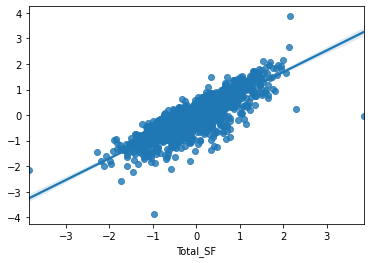

In [106]:
sns.regplot(y=y_train_,x=X_train_.loc[:, "Total_SF"])

In [110]:
y_pred_train_1 = lr_best.predict(X_train_.loc[:, "Total_SF"].values.reshape(-1,1))

In [128]:
y_pred_test_1 = lr_best.predict(X_test_.loc[:, "Total_SF"].values.reshape(-1,1))

In [111]:
y_pred_res = y_train_-y_pred_train_1

<AxesSubplot:xlabel='Total_SF'>

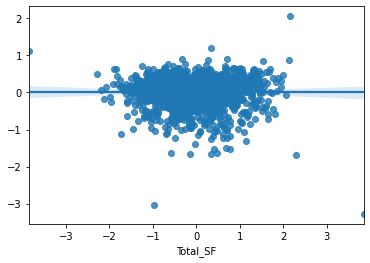

In [112]:
sns.regplot(y=y_pred_res, x=X_train_.loc[:, "Total_SF"])

In [117]:
from scipy.stats import randint, uniform
from xgboost import XGBRegressor

In [118]:

param_distributions = {
    
    "verbosity"    : [1],

}

rf_rscv = cmd_rscv(
    XGBRegressor(),
    param_distributions,
    n_iter       = 1,
    cv           = cv,
    verbose      = 1,
    random_state = None,
)

In [119]:
%%time

rf_rscv.doit(X_train_, y_pred_res)

Fitting 50 folds for each of 1 candidates, totalling 50 fits
Wall time: 33.9 s


In [120]:
rf_rscv.df(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_verbosity,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,split15_test_score,split16_test_score,split17_test_score,split18_test_score,split19_test_score,split20_test_score,split21_test_score,split22_test_score,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,split30_test_score,split31_test_score,split32_test_score,split33_test_score,split34_test_score,split35_test_score,split36_test_score,split37_test_score,split38_test_score,split39_test_score,split40_test_score,split41_test_score,split42_test_score,split43_test_score,split44_test_score,split45_test_score,split46_test_score,split47_test_score,split48_test_score,split49_test_score,mean_test_score,std_test_score,rank_test_score
0,1.516804,0.286469,0.011921,0.003724,1,{'verbosity': 1},-0.242278,-0.296713,-0.227856,-0.28021,-0.217922,-0.280913,-0.238527,-0.240113,-0.226847,-0.283596,-0.240133,-0.253848,-0.236368,-0.227957,-0.288671,-0.240296,-0.249704,-0.237859,-0.238685,-0.294665,-0.288406,-0.251865,-0.229871,-0.243887,-0.230781,-0.230837,-0.248627,-0.266243,-0.288952,-0.247987,-0.234052,-0.260033,-0.26486,-0.26564,-0.248771,-0.232524,-0.239681,-0.271701,-0.301951,-0.222798,-0.249803,-0.255005,-0.224224,-0.218586,-0.291943,-0.209823,-0.228636,-0.28552,-0.268133,-0.25061,-0.251898,0.023947,1


In [122]:
rf_best_res = XGBRegressor(**rf_rscv.best())

In [123]:
y_pred_res.describe()

count    1.460000e+03
mean     6.691755e-18
std      4.099970e-01
min     -3.280190e+00
25%     -1.947404e-01
50%      5.413121e-02
75%      2.619685e-01
max      2.053528e+00
dtype: float64

In [124]:
rf_best_res.fit(X_train_, y_pred_res)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=1)

In [125]:
y_pred_err = rf_best_res.predict(X_train_)

In [127]:
pd.Series(y_pred_err).describe()

count    1460.000000
mean        0.000025
std         0.405966
min        -3.279237
25%        -0.187015
50%         0.055417
75%         0.261595
max         2.039264
dtype: float64

In [129]:
y_pred_err_test = rf_best_res.predict(X_test_)

In [130]:
y_pred = y_pred_err_test + y_pred_test_1

In [131]:
pd.Series(y_pred).describe()

count    1459.000000
mean        2.888597
std         0.199184
min         2.168477
25%         2.751081
50%         2.843746
75%         3.006620
max         3.564033
dtype: float64

In [132]:
def my_sub(y_pred: np.ndarray, file_name: str) -> str:
    y_samp.SalePrice = y_pred
    path_0 = "../Sub/"
    path_1 = ".csv"
    full_path = path_0 + file_name + path_1
    y_samp.astype(np.int64).to_csv(full_path, index=False)
    return full_path

In [134]:
y_pred_ = y_transform.inverse_transform(y_pred)

ValueError: Expected 2D array, got 1D array instead:
array=[2.65897307 2.78208342 2.84221998 ... 2.71545449 3.02818233 2.81749153].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [223]:
def imshow(img, figsize=(10,10)):
    if img.ndim > 2:
        plt.figure(figsize=figsize)
        plt.imshow(img)
        plt.axis(False)
        plt.show()
    else:
        plt.figure(figsize=figsize)
        plt.imshow(img, cmap='gray')
        plt.axis(False)
        plt.show()

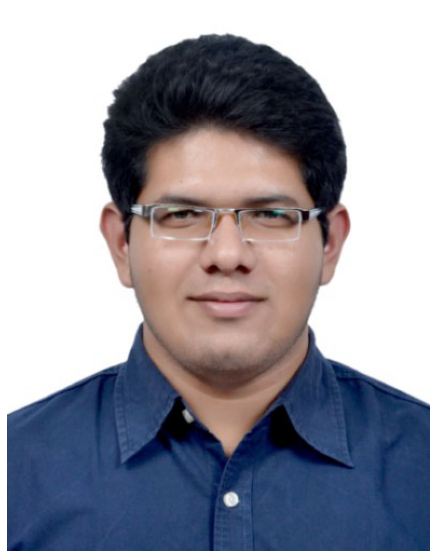

In [224]:
img = plt.imread(r"K:\OFFICIAL\NITC Admission Files\My Pictures\Photo.jpg")

imshow(img)

In [225]:
from skimage.color import rgb2gray
from skimage.filters import laplace, sobel, threshold_local
from sklearn.cluster import MiniBatchKMeans, KMeans

def me_anime(img, cluster = 8, cut_off = 0.07,True_Mean = False):
    X_train = img.reshape(-1, 3)
    
    anime = KMeans(n_clusters=cluster) if True_Mean else MiniBatchKMeans(n_clusters=cluster)
    anime.fit(X_train)
    
    cc = anime.cluster_centers_.astype(np.uint8)
    
    X_pred  = anime.predict(X_train)
    x_train = X_train.copy()
    
    for n, _ in enumerate(X_pred):
        x_train[n] = cc[_]
    
    im_anime = x_train.reshape(img.shape)
    
    
    im_gray = rgb2gray(img)
    
    im_mask = np.where(sobel(im_gray)> cut_off, 1.0, 0.0)
    
    IMG = [ (img[...,i]*im_mask).astype(np.uint8) for i in range(3) ]
    
    im_mask = im_mask.astype(np.uint8)

    img_edge = np.dstack(IMG)
    invert_mask  = 1 - im_mask
    
    im_final = np.dstack([ (im_anime[...,i] * invert_mask).astype(np.uint8) for i in range(3) ]) + img_edge
    
    
#     imshow(img_edge)
#     imshow(im_anime)
    imshow(img)
    imshow(im_final)

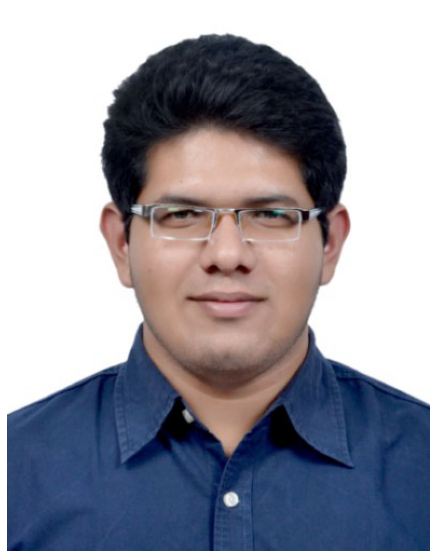

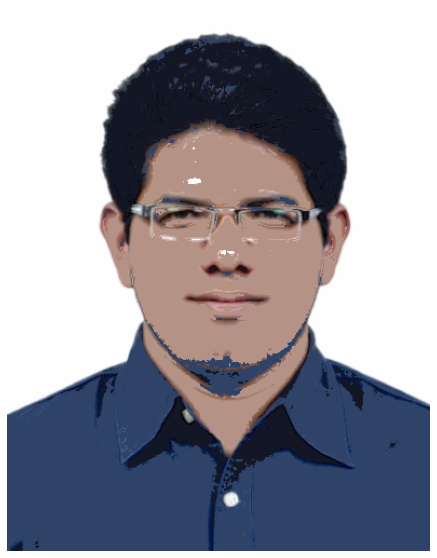

In [239]:
me_anime(img, cluster=4, cut_off=0.04, True_Mean=True)

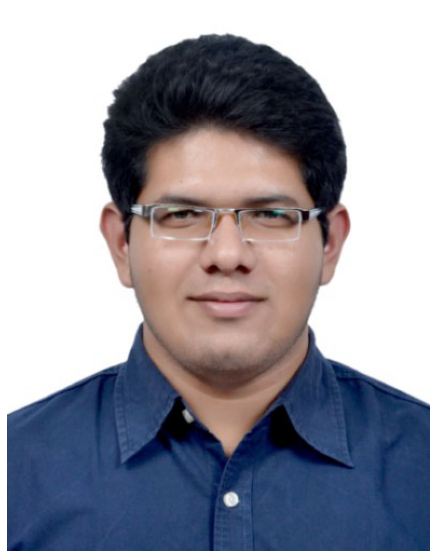

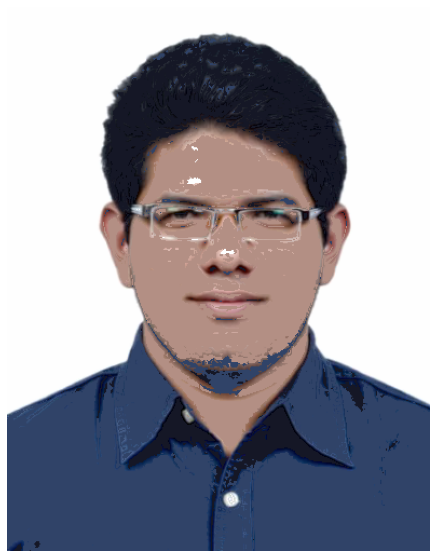

In [238]:
me_anime(img, cluster=4, cut_off=0.03, True_Mean=False)

In [228]:
from skimage.data import astronaut, cat, rocket

In [ ]:
me_anime(rocket(), 4)